# 2. 분류

In [1]:
import numpy as np
import pandas as pd
import os
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
df_youtube = pd.read_csv("C:/netsong7/pythonwork/AI/data cleaning(final)/youtubecomment.csv", encoding='utf-8-sig')
df_cafe = pd.read_csv("C:/netsong7/pythonwork/AI/data cleaning(final)/navercafe.csv", encoding='utf-8-sig')
df_shopping = pd.read_csv("C:/netsong7/pythonwork/AI/data cleaning(final)/navershopping.csv", encoding='utf-8-sig')

In [13]:
okt = Okt()

In [14]:
stopwords = pd.read_table("stopwords.txt", encoding='utf-8-sig', header=None)
stopwords = list(stopwords[0])

In [15]:
total_data = df_shopping[["review","star"]]

In [16]:
total_data["review"] = list(map(str, list(total_data["review"])))

In [17]:
# df_cafe, df_shopping, df_youtube
total_data['tokenized'] = total_data['review'].apply(okt.morphs)
total_data['tokenized'] = total_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [23]:
total_data = total_data[["tokenized","star"]]


In [24]:
total_data['label'] = np.select([total_data.star > 4], [1], default=0)
total_data

,tokenized,star,label
0,"[말, 그래도, 최고, 입니다, 당일, 배송, 맞구요, 택배, 파업, 늦어질, 줄,...",5,1
1,"[삼성, 전자, 갤럭시, 워치, 사고, 싶지만, 가격, 대가, 높아서, 망설이던, ...",5,1
2,"[실, 구매, 원, 구매, 했습니다, 친구, 선물, 로, 사줬는데, 엄청, 좋아하네...",5,1
3,"[제, 생일, 기념, 해서, 부모님, 께, 각각, 왓치, 하나, 씩, 사, 드렸어요...",5,1
4,"[화면, 큰, 걸, 로, 하고싶어서, 실버, 로, 구매, 했는데, 손목, 대비, 살...",5,1
...,...,...,...
13433,"[제품, 좋아요, 사용, 하고, 있습니다]",3,0
13434,[삼성],3,0
13435,"[개인정보, 만, 털린게, 아닌지, 어쨌든, 기대, 해봅니다]",2,0
13436,"[구, 매, 확정, 하, 래, ㅋㄲㅋ, 증시, 난다]",1,0


In [59]:
total_data[total_data["label"]==0].count()

tokenized    7525
star         7525
label        7525
dtype: int64

In [60]:
total_data[total_data["label"]==1].count()

tokenized    5913
star         5913
label        5913
dtype: int64

In [25]:
train_data, test_data = train_test_split(total_data, test_size=0.2, random_state=0)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 10750
테스트용 리뷰의 개수 : 2688


In [26]:
train_data["label"].unique()

array([0, 1])

In [69]:
train_data[train_data["label"]==0].count()

tokenized    6011
star         6011
label        6011
dtype: int64

In [70]:
train_data[train_data["label"]==1].count()

tokenized    4739
star         4739
label        4739
dtype: int64

In [27]:
words_1 = np.hstack(train_data[train_data["label"] == 0]['tokenized'].values)
words_2 = np.hstack(train_data[train_data["label"] == 1]['tokenized'].values)


In [28]:
words_1_count = Counter(words_1)
print(words_1_count.most_common(20))
print("==================================================================================")
words_2_count = Counter(words_2)
print(words_2_count.most_common(20))

[('배송', 2000), ('사용', 1394), ('제품', 1197), ('로', 1176), ('안', 1058), ('구매', 1018), ('너무', 946), ('것', 843), ('하고', 821), ('에서', 803), ('요', 786), ('버즈', 771), ('좋아요', 729), ('했는데', 715), ('센터', 680), ('때', 665), ('생각', 620), ('음질', 611), ('더', 609), ('해서', 606)]
[('사용', 2780), ('로', 2401), ('너무', 2185), ('배송', 2090), ('구매', 2041), ('것', 1878), ('노트북', 1696), ('버즈', 1581), ('에서', 1453), ('제품', 1409), ('하고', 1354), ('갤럭시', 1236), ('할', 1187), ('생각', 1153), ('했는데', 1146), ('때', 1105), ('기능', 1091), ('더', 1080), ('프로', 1060), ('제', 1015)]


부정 리뷰의 평균 길이 : 27.486774247213443
긍정 리뷰의 평균 길이 : 56.67841316733488


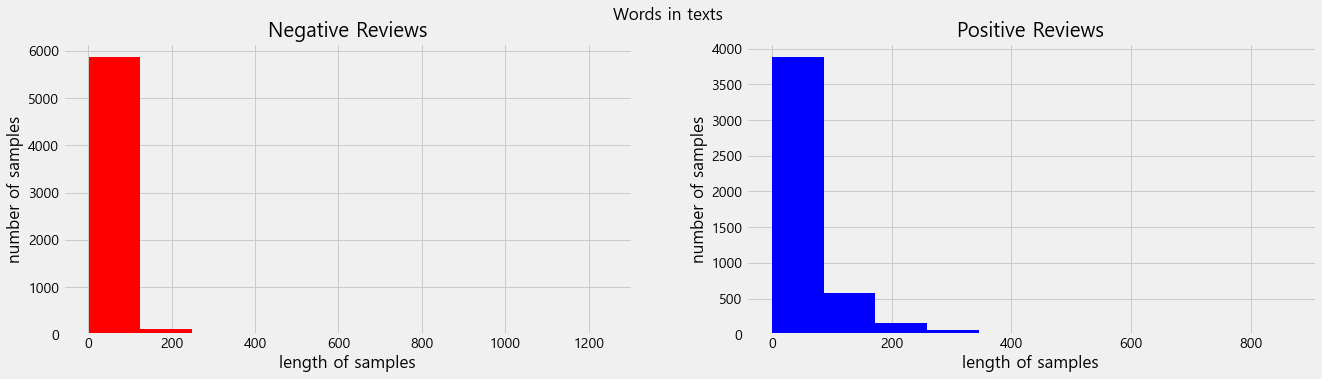

In [32]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Negative Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Positive Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

plt.show()

In [33]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [35]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 29907
등장 빈도가 1번 이하인 희귀 단어의 수: 14879
단어 집합에서 희귀 단어의 비율: 49.7508944394289
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.42974768453421


In [36]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 15030


In [37]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

리뷰의 최대 길이 : 1242
리뷰의 평균 길이 : 40.35553488372093


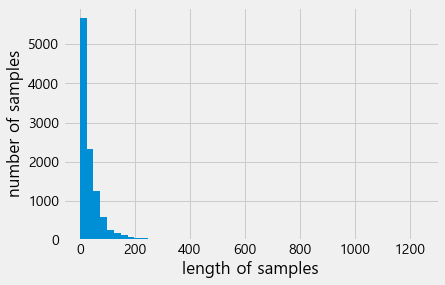

In [38]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [39]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))


In [42]:
max_len = 200
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 200 이하인 샘플의 비율: 97.76744186046513


In [43]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(10750, 200)
(2688, 200)
(10750,)
(2688,)


In [46]:
y_train = train_data['label'].values
y_test = test_data['label'].values

In [47]:
from keras.utils import to_categorical
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
print(X_train.shape)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_test.shape)

# y_data = np.concatenate((y_train, y_test))
# y_data = to_categorical(y_data)
# y_data

# y_train = y_data[:10750]
# y_test = y_data[10750:]

print(y_train.shape)
print(y_test.shape)

(10750, 200, 1)
(2688, 200, 1)
(10750,)
(2688,)


In [48]:
from keras.layers import SimpleRNN
import keras
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.optimizers import RMSprop, Adam, SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# model = Sequential()
# model.add(Dense(64, input_dim=(500,1), activation="relu"))
# model.add(Dense(64, activation="relu"))
# model.add(Dense(6, activation="softmax"))

# model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])

# model.summary()

# model.fit(X_train, y_train, epochs=15, batch_size=32)

In [53]:
def vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(units=50, input_shape=(200, 1), return_sequences=False))
    model.add(Dense(2, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])
    
    return model

In [54]:
model = KerasClassifier(build_fn=vanilla_rnn, epochs=20, batch_size=50, verbose=1)
model.fit(X_train, y_train) # loss: 0.8624 - accuracy: 0.7405


Epoch 1/20
10750/10750 [==============================] - 6s 600us/step - loss: 0.6902 - accuracy: 0.5507
Epoch 2/20
10750/10750 [==============================] - 6s 594us/step - loss: 0.6836 - accuracy: 0.5664
Epoch 3/20
10750/10750 [==============================] - 6s 579us/step - loss: 0.6817 - accuracy: 0.5694
Epoch 4/20
10750/10750 [==============================] - 6s 602us/step - loss: 0.6846 - accuracy: 0.5527
Epoch 5/20
10750/10750 [==============================] - 6s 591us/step - loss: 0.6826 - accuracy: 0.5703
Epoch 6/20
10750/10750 [==============================] - 7s 615us/step - loss: 0.6830 - accuracy: 0.5620
Epoch 7/20
10750/10750 [==============================] - 7s 661us/step - loss: 0.6818 - accuracy: 0.5700
Epoch 8/20
10750/10750 [==============================] - 7s 664us/step - loss: 0.6825 - accuracy: 0.5667
Epoch 9/20
10750/10750 [==============================] - 7s 659us/step - loss: 0.6807 - accuracy: 0.5692
Epoch 10/20
10750/10750 [====================

In [57]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

print(accuracy_score(y_pred, y_test))
mat = confusion_matrix(y_test , y_pred)
mat

2688/2688 [==============================] - 1s 217us/step
0.5814732142857143


array([[1316,  198],
       [ 927,  247]], dtype=int64)

In [61]:
def stacked_vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(units=50, input_shape=(200, 1), return_sequences=True))
    model.add(SimpleRNN(units=50, return_sequences=False))
    model.add(Dense(2, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])
    
    return model
model = KerasClassifier(build_fn=stacked_vanilla_rnn, epochs=10, batch_size=50, verbose=1)
model.fit(X_train, y_train) # loss: 0.8624 - accuracy: 0.7405

Epoch 1/10
10750/10750 [==============================] - 13s 1ms/step - loss: 0.6948 - accuracy: 0.5430
Epoch 2/10
10750/10750 [==============================] - 13s 1ms/step - loss: 0.6734 - accuracy: 0.5820
Epoch 3/10
10750/10750 [==============================] - 14s 1ms/step - loss: 0.6700 - accuracy: 0.5910
Epoch 4/10
10750/10750 [==============================] - 15s 1ms/step - loss: 0.6790 - accuracy: 0.5725
Epoch 5/10
10750/10750 [==============================] - 15s 1ms/step - loss: 0.6825 - accuracy: 0.5583
Epoch 6/10
10750/10750 [==============================] - 15s 1ms/step - loss: 0.6758 - accuracy: 0.5716
Epoch 7/10
10750/10750 [==============================] - 15s 1ms/step - loss: 0.6778 - accuracy: 0.5680
Epoch 8/10
10750/10750 [==============================] - 15s 1ms/step - loss: 0.6738 - accuracy: 0.5730
Epoch 9/10
10750/10750 [==============================] - 15s 1ms/step - loss: 0.6739 - accuracy: 0.5780
Epoch 10/10
2688/2688 [==============================] 

AxisError: axis 1 is out of bounds for array of dimension 1

In [64]:
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))
mat = confusion_matrix(y_test , y_pred)
mat

2688/2688 [==============================] - 2s 843us/step
0.5710565476190477


array([[1475,   39],
       [1114,   60]], dtype=int64)

In [65]:
from keras.layers import *
from keras.models import Sequential
from keras.applications.resnet50 import ResNet50

CLASS_COUNT = 10

base_model = ResNet50(
    weights='imagenet',
    include_top=False, 
    input_shape=(224, 224, 3), 
    pooling='avg',
)
base_model.trainable = False

model = Sequential([
  base_model,
  Dense(CLASS_COUNT, activation='softmax'),
])

In [67]:
def lstm_rnn():
    model = Sequential()
    model.add(LSTM(units=100, input_shape=(200, 1), return_sequences=False))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(2, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])
    
    return model

model = KerasClassifier(build_fn=lstm_rnn, epochs=10, batch_size=50, verbose=1)
model.fit(X_train, y_train) # loss: 0.8624 - accuracy: 0.7405

y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))
mat = confusion_matrix(y_test , y_pred)
mat

Epoch 1/10
10750/10750 [==============================] - 35s 3ms/step - loss: 0.6391 - accuracy: 0.6499
Epoch 2/10
10750/10750 [==============================] - 37s 3ms/step - loss: 0.6297 - accuracy: 0.6600
Epoch 3/10
10750/10750 [==============================] - 37s 3ms/step - loss: 0.6256 - accuracy: 0.6615
Epoch 4/10
10750/10750 [==============================] - 38s 4ms/step - loss: 0.6246 - accuracy: 0.6628
Epoch 5/10
10750/10750 [==============================] - 37s 3ms/step - loss: 0.6219 - accuracy: 0.6635
Epoch 6/10
10750/10750 [==============================] - 37s 3ms/step - loss: 0.6195 - accuracy: 0.6701
Epoch 7/10
10750/10750 [==============================] - 37s 3ms/step - loss: 0.6174 - accuracy: 0.6696
Epoch 8/10
10750/10750 [==============================] - 38s 4ms/step - loss: 0.6134 - accuracy: 0.6715
Epoch 9/10
10750/10750 [==============================] - 38s 4ms/step - loss: 0.6128 - accuracy: 0.6740
Epoch 10/10
2688/2688 [==============================] 

array([[1272,  242],
       [ 634,  540]], dtype=int64)

In [68]:
def lstm_rnn():
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(200, 1), return_sequences=False))
    model.add(Dense(2, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])
    
    return model

model = KerasClassifier(build_fn=lstm_rnn, epochs=10, batch_size=50, verbose=1)
model.fit(X_train, y_train) # loss: 0.8624 - accuracy: 0.7405

y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))
mat = confusion_matrix(y_test , y_pred)
mat

Epoch 1/10
10750/10750 [==============================] - 24s 2ms/step - loss: 0.6429 - accuracy: 0.6408
Epoch 2/10
10750/10750 [==============================] - 24s 2ms/step - loss: 0.6285 - accuracy: 0.6603
Epoch 3/10
10750/10750 [==============================] - 23s 2ms/step - loss: 0.6274 - accuracy: 0.6649
Epoch 4/10
10750/10750 [==============================] - 23s 2ms/step - loss: 0.6236 - accuracy: 0.6649
Epoch 5/10
10750/10750 [==============================] - 23s 2ms/step - loss: 0.6216 - accuracy: 0.6659
Epoch 6/10
10750/10750 [==============================] - 23s 2ms/step - loss: 0.6194 - accuracy: 0.6680
Epoch 7/10
10750/10750 [==============================] - 23s 2ms/step - loss: 0.6187 - accuracy: 0.6678
Epoch 8/10
10750/10750 [==============================] - 23s 2ms/step - loss: 0.6139 - accuracy: 0.6722
Epoch 9/10
10750/10750 [==============================] - 23s 2ms/step - loss: 0.6129 - accuracy: 0.6744
Epoch 10/10
2688/2688 [==============================] 

array([[1267,  247],
       [ 633,  541]], dtype=int64)